# Versuch 233: Fourieroptik

In [2]:
import matplotlib
import numpy as np
import pandas as pd 
from pandas import DataFrame as df
import matplotlib.pyplot as plt

from helper import *

%matplotlib inline

## Teil 0: Eichung der Abszisse

In [3]:
eichdata = np.genfromtxt("data/eichung.dat",skip_header=1)
deichung = eichdata[:-1]-eichdata[1:]
eichwerte = deichung.T[2]/deichung.T[1]
eichwert = np.mean(eichwerte)
deichwert = np.sqrt(np.sum((eichwert-eichwerte)**2)/6)
eichwert = abs(eichwert)
printResult("m_{eich}",eichwert,error=deichwert,unit='\mu m/px')

<IPython.core.display.Math object>

## Teil 1: Einzelspalt 

In [4]:
data = np.genfromtxt('data/einzelspaltminmax.dat',skip_header=1)
maxdata = data[:11]
mindata = data[11:]

ddist = np.sqrt(2)*data[0,5]
#plt.plot(data[:,2], data[:,3], marker='.',linestyle='none')
#plt.show()

In [5]:
distmin = mindata[:5]-mindata[5:]
distmax = maxdata[1:6]-maxdata[6:]

curve, popt, pcov = fit_lin(distmin[:,1]/2,distmin[:,2])

#plt.errorbar(distmax[:,1]/2,distmax[:,2],yerr=ddist,marker='.',linestyle='none')
x = np.linspace(0,6,7)
#plt.plot(x, popt[0]*x+popt[1])
#plt.show()

In [6]:
m, c = popt
dm,dc = np.sqrt((pcov[0,0],pcov[1,1]))

printResult('c',c,error=dc,unit='px')
printResult('m',m,error=dm,unit='px')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

NameError: name 'pls' is not defined

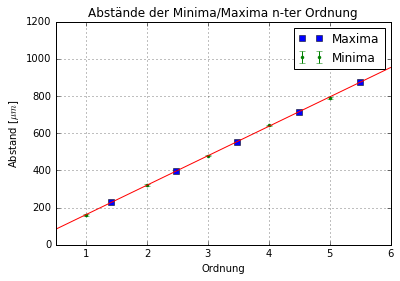

In [7]:
n = (distmax[:,2]-c)/m 
dn = [relErr([ddist,dc,dm*(distmax[i,2]-c)],[m,m,m**2]) for i in range(5)]
plt.errorbar(n,distmax[:,2],linestyle='none',marker='s', label='Maxima')
plt.errorbar(distmin[:,1]/2, distmin[:,2], yerr=ddist, marker=".", linestyle='none',label='Minima')
plt.plot(x, popt[0]*x+popt[1])
plt.xlim([.5,6])
plt.ylim([0,1200])
plt.grid()
plt.legend()
plt.title('Abstände der Minima/Maxima n-ter Ordnung')
plt.xlabel('Ordnung')
plt.ylabel('Abstand [$\mu m$]')
pls.savefig("abst.pdf", format="PDF")
plt.show()

### Spaltbreite

In [7]:
b, db = eichwert*m, np.sqrt((dm*eichwert)**2+(deichwert*m)**2)
printResult("b_{\mu m}",b,error=db,unit="\mu m")

<IPython.core.display.Math object>

In [8]:
lamb = 0.635 #mum
f = 80000 # mum

d, dd = 2 * f * lamb / b, db*2*f*lamb/(b**2)
printResult("d",d,error=dd,unit="\mu m")

<IPython.core.display.Math object>

In [9]:
nn = np.linspace(1,5,5)
nt = ((nn+.5)*np.pi - 1/((nn+.5)*np.pi))/np.pi
df(np.array([nn,nt,n,dn,(nt-n)/dn]).T)

,0,1,2,3,4
0,1.0,1.432453,1.414937,0.039137,0.447555
1,2.0,2.459472,2.472367,0.042286,-0.304955
2,3.0,3.471051,3.472221,0.046464,-0.025186
3,4.0,4.477484,4.492575,0.051632,-0.292281
4,5.0,5.481578,5.502110,0.057405,-0.357671


### Verhältnisse der Maxima

In [10]:
iu = (86.5+83.5)/2

iq = [((maxdata[i+1,3]+maxdata[i+6,3])/2)-iu for i in range(5)]
diq = np.sqrt(2*(0.5*np.sqrt(2))**2)
iq0 = maxdata[0,3]-iu
iq.insert(0,iq0)
diq = np.linspace(diq,diq,6)
df(np.array([iq,diq]).T)

,0,1
0,3825.00,1.0
1,251.25,1.0
2,89.95,1.0
3,37.20,1.0
4,26.85,1.0
5,17.50,1.0


In [11]:
vexp = iq[1:]/iq[0]
dvexp = vexp*relErr([1,1,1,1,1,1],iq)
vtheo = (np.sin(nt*np.pi)/(nt*np.pi))**2
df(np.array([vexp,dvexp,vtheo]).T, 
   columns=("$(I_n/I_0)_{exp}$",
            "$\Delta (I_n/I_0)_{exp}$",
            "$(I_n/I_0)_{theo}$"),
   index=(1,2,3,4,5))

,$(I_n/I_0)_{exp}$,$\Delta (I_n/I_0)_{exp}$,$(I_n/I_0)_{theo}$
1,0.065686,0.004878,0.047188
2,0.023516,0.001746,0.016480
3,0.009725,0.000722,0.008340
4,0.007020,0.000521,0.005029
5,0.004575,0.000340,0.003361


## Teil 2: Doppelspalt

### Eichung 2

In [12]:
eichdata = np.genfromtxt("data/eichung2.dat",skip_header=1)
deichung = eichdata[:-1]-eichdata[1:]
eichwerte = deichung.T[2]/deichung.T[1]
eichwert = np.mean(eichwerte)
deichwert = np.sqrt(np.sum((eichwert-eichwerte)**2)/6)
eichwert = abs(eichwert)
printResult("m_{eich}",eichwert,error=deichwert,unit='\mu m/px')

<IPython.core.display.Math object>

### Spaltabstand und -breite

In [13]:
d1, d2 =126.8, 133.1
d, dd = 0.5*(d1+d2), 0.5*np.sqrt(2*(4.2)**2)
printResult("d_B", d, error=dd, unit="px")

<IPython.core.display.Math object>

In [14]:
g, dg = d + 178.5, np.sqrt(4.2**2+dd**2)
printResult("g_B",g,error=dg,unit="px")

<IPython.core.display.Math object>

In [15]:
gd = g/d
dgd = gd * relErr([dg,dd],[g,d])
printResult("g/d", gd, error=dgd)

<IPython.core.display.Math object>

In [16]:
beta, dbeta = (72/9)-1, 2/90
printResult("\beta", beta, error=dbeta)

<IPython.core.display.Math object>

In [17]:
g, dg = g * eichwert, dg * eichwert
d, dd = d * eichwert, dd * eichwert
printResult("g_B", g, error=dg, unit="\mu m")
printResult("d_B", d, error=dd, unit="\mu m")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
gg = g/beta
dgg = gg* relErr([dg,dbeta],[g,beta])
printResult("g",gg,error=dgg,unit="\mu m")

<IPython.core.display.Math object>

In [19]:
d = d/beta
dd = d* relErr([dd,dbeta],[d,beta])
printResult("d",d,error=dd,unit="\mu m")

<IPython.core.display.Math object>

### Intensitätsverhältnisse

In [20]:
data = np.genfromtxt('data/doppelspaltminmax.dat',skip_header=1)
maxdata = data[4:]
mindata = data[:4]

#plt.plot(data[:,2], data[:,4], marker='.', linestyle = 'none')
#plt.show()

In [21]:
iu = (95.2+97)/2

iq = ((maxdata[0,4]+maxdata[2,4])/2)-iu
diq = np.sqrt(2*(0.5*np.sqrt(2))**2)
iq0 = maxdata[1,4]-iu
df(np.array([[iq0,iq],[diq,diq]]).T)

,0,1
0,3426.9,1.0
1,2108.9,1.0


In [22]:
vexp = iq/iq0
dvexp = vexp*relErr(1,iq)
vtheo = (np.sin(nt[0]*np.pi)/(nt[0]*np.pi))**2
df(np.array([vexp,dvexp,vtheo]).T, 
   index=("$(I_n/I_0)_{exp}$",
          "$\Delta (I_n/I_0)_{exp}$",
          "$(I_n/I_0)_{theo}$"))

,0
$(I_n/I_0)_{exp}$,0.615396
$\Delta (I_n/I_0)_{exp}$,0.000292
$(I_n/I_0)_{theo}$,0.047188


## Teil3: Objektbild als Fouriersynthese (Einzelspalt)

In [23]:
d, dd = 127.0 * eichwert / beta, 4.2 + eichwert / beta
printResult("d_B",d,error=dd,unit="\mu m")

<IPython.core.display.Math object>

### experimentelle Werte

In [24]:
data0 = np.genfromtxt('data/eswiggles0.dat',skip_header=1)
data1 = np.genfromtxt('data/eswiggles1.dat',skip_header=1)
data2 = np.genfromtxt('data/eswiggles2.dat',skip_header=1)

iu = (data0[-1] +data0[-2] +data1[-1] +data1[-2] +data2[-1] +data2[-2])/6
data0 = data0 - iu
a = data1[:3,3]/data0[0,3]
b = data2[:5,3]/data0[0,3]
vexp = np.concatenate((a,b))
dvexp = np.sqrt((10/data0[0,3])**2
                +((np.sqrt(200))/np.concatenate((data1[:3,3],data2[:5,3])))**2)

### theoretische Werte

In [25]:
a = np.array([1,1,.65])*1.26/1.39
b = np.array([1,.93,1,.7,.7])*1.23/1.39
vtheo = np.concatenate((a,b))

In [26]:
df(np.array([vexp,dvexp,vtheo,abs(vtheo-vexp)/dvexp/20]).T, 
   index=("1,1","1,2","1,1","2,1","2,2","2,3","2,1","2,2"),
   columns=("($I_n/I_0)_{exp}$",
            "$\Delta (I_n/I_0)_{exp}$",
            "$(I_n/I_0)_{theo}$",
            "$\Delta (I_n/I_0)_{theo}$"))

,($I_n/I_0)_{exp}$,$\Delta (I_n/I_0)_{exp}$,$(I_n/I_0)_{theo}$,$\Delta (I_n/I_0)_{theo}$
"1,1",1.126563,0.005281,0.906475,2.083930
"1,2",1.075894,0.005434,0.906475,1.558852
"1,1",0.954157,0.005883,0.589209,3.101855
"2,1",1.131169,0.005267,0.884892,2.337723
"2,2",1.043979,0.005540,0.822950,1.994887
"2,3",1.083461,0.005410,0.884892,1.835176
"2,1",0.967975,0.005825,0.619424,2.991774
"2,2",0.922900,0.006020,0.619424,2.520409


### Theorie

In [27]:
A1, dA1 = .5 * d, .02 * d
printResult("A_1^{theo}",A1,error=dA1,unit="\mu m")

<IPython.core.display.Math object>

In [28]:
A2, dA2 = .68 * d, .02 * d
printResult("A_2^{theo}",A2,error=dA2,unit="\mu m")

<IPython.core.display.Math object>

### Experimentell

In [29]:
A1 = abs(data1[0,1]-data1[1,1])*eichwert/beta
dA1 = A1 * relErr([data1[0,2]*np.sqrt(2),dbeta],[abs(data1[0,1]-data1[1,1]),beta])
printResult("A_1^{exp}",A1,error=dA1,unit="\mu m")

<IPython.core.display.Math object>

In [30]:
A2 = abs(data2[0,1]-data2[2,1])*eichwert/beta
dA2 = A2 * relErr([data2[0,2]*np.sqrt(2),dbeta],[abs(data2[0,1]-data2[2,1]),beta])
printResult("A_2^{exp}",A2,error=dA2,unit="\mu m")

<IPython.core.display.Math object>

## Aufgabe 4: Auflösungsgrenze des Doppelspalts

### a) zwei Gausskurven

In [31]:
kntheo = lambda n,d:2*np.pi*n/d
dkntheo = lambda n,d,dd: kntheo(n,d)*dd/d

printResult("k_{y,1}^{theo}",kntheo(1,.5393),error=dkntheo(1,.5393,.0863),unit="1/m m")

<IPython.core.display.Math object>

In [32]:
knexp = lambda b,lamb,f: 2*np.pi*b/lamb/f
dknexp = lambda b,db,lamb,f: knexp(b,lamb,f)*db/b

printResult("k_{y,1}^{exp}",knexp(.12,635/10**6,80),error=dknexp(.12,.005,635/10**6,80),unit="1/mm")

<IPython.core.display.Math object>

### b) Plateau

In [33]:
printResult("k_{y,.284}^{theo}",kntheo(0.284,.5393),error=dkntheo(.284,.5393,.0863),unit="1/m m")

<IPython.core.display.Math object>

In [34]:
printResult("k_{y,.284,1}^{exp}",knexp(.08,635/10**6,80),error=dknexp(.08,.005,635/10**6,80),unit="1/mm")

<IPython.core.display.Math object>